In [2]:
from Clases.Codigo import *

In [3]:
def superVectores(vs1,vs2,maximo=20):
    (u1,u2),(v1,v2) = vs1
    (p1,p2),(q1,q2) = vs2
    eq0 = (q1*p2)-(q2*p1)
    eq1 = (q1*u2)-(q2*u1)
    eq2 = (q1*v2)-(q2*v1)
    eq3 = (p2*u1)-(p1*u2)
    eq4 = (p2*v1)-(p1*v2)
    vi, vs = (0,0), (0,0)
    du, dv = 1.0, 1.0
    hist = []
    err = 0.1
    if eq0 == 0:
        return [(0,0),(0,0),0.0,[1.0,1.0]]
    for b in range(maximo):
        for a in range(maximo):
            #print("--{},{}--".format(a,b))
            if ((a,b)!=(0,0)):
                c = ((a*eq1)-(b*eq2))/eq0
                d = ((a*eq3)-(b*eq4))/eq0
                pi = m2V((u1,u2),(v1,v2), (a,-b))
                ps = m2V((p1,p2),(q1,q2), (round(c),round(d)))
                erm = dist(pi,ps)
                #print("({},{}):err={}".format(a,b,erm))
                if erm<err:
                    err=erm
                    if c!=0.0: du = round(c)/c
                    else: du = 1.0
                    if d!=0.0: dv = round(d)/d
                    else: dv = 1.0
                    vi, vs = (a,b), (round(c),round(d))
                    hist.append([vi,err,[du,dv]])
                    #print("\tNuevos mejores ({},{}) err={}".format(a,b,err))
    return [vi, vs, err, [du,dv]]

def super2M(me1, me2):
    (u,v)=(me1.u,me1.v)
    (p,q)=(me2.u,me2.v)
    r0 = superVectores((u,v),(p,q))
    m,n = r0[0]
    print("Matriz t:\n\t|\t{}\t{}\t|\n\t|\t{}\t{}\t|".format(m,n,-n,(m+n)))
    su, sv = transfVs(me1.u,me1.v,(m,n,-n,(m+n)))
    #rm = superMesh(su,sv,[me1,me2])
    #print(rm)
    return su, sv

def superM(lom):
    if len(lom)<2:
        print("ERROR\nDebe haber al menos 2 mallas")
        return hexa6(1.0)
    su, sv = super2M(lom[0],lom[1])
    for i in range(2,len(lom)):
        su, sv = super2M(Malla(su, sv),lom[i])
    return superMesh(su, sv,lom)

def graph(vs1,vs2,maximo=30):
    (u1,u2),(v1,v2) = vs1
    (p1,p2),(q1,q2) = vs2
    eq0 = (q1*p2)-(q2*p1)
    eq1 = (q1*u2)-(q2*u1)
    eq2 = (q1*v2)-(q2*v1)
    eq3 = (p2*u1)-(p1*u2)
    eq4 = (p2*v1)-(p1*v2)
    vi, vs = (0,0), (0,0)
    du, dv = 1.0, 1.0
    xs=[]
    ys=[]
    zs=[]
    hist = []
    err = 0.3
    if eq0 == 0:
        return hist
    for b in range(maximo):
        for a in range(maximo):
            #print("--{},{}--".format(a,b))
            erm = 1.0
            if ((a,b)!=(0,0)):
                c = ((a*eq1)-(b*eq2))/eq0
                d = ((a*eq3)-(b*eq4))/eq0
                pi = m2V((u1,u2),(v1,v2), (a,-b))
                ps = m2V((p1,p2),(q1,q2), (round(c),round(d)))
                erm = dist(pi,ps)
            xs.append(a)
            ys.append(b)
            if erm<err:
                zs.append(erm)
            else:
                zs.append(err)
        hist.append([xs,ys,zs])
        xs=[]
        ys=[]
        zs=[]
    return hist

In [3]:
m0 = hexa3(2.44, atms=['C','C'])
#m0.showNM(4,4)

In [ ]:
m1 = hexa6(2.44, atms=['C','Si'])
m1.atms[0][0].color='Blue'
m1.atms[1][0].color='Darkred'
#m1.showNM(1,1)

In [ ]:
mr = m1.mRot(10.99)
superVectores((m1.u,m1.v),(mr.u,mr.v))

In [ ]:
sm = superM([m0,m0.mRot(10.99),m0.mRot(13.17)])
#sm.exporta(name='3capas')

In [ ]:
sm = superM([m0.mRot(10.99),m0.mRot(13.17),m0])
sm.exporta(name='m0(10.99),m0(13.17),m0')

In [ ]:
sm = superM([m0.mRot(13.17),m0,m0.mRot(10.99)])
#sm.exporta(name='3capas')

In [ ]:
sm.showNM(1,1)

In [ ]:
sm2 = superM([m0,m1,mr])
sm2.exporta(name='3capas2')

In [ ]:
sm2.showNM(1,1)

In [ ]:
mr2=m1.mRot(60)
mr2.showNM(1,1)

In [ ]:
sm2 = superM([mr2,m1,mr])
sm2.exporta(name='3capas3')

In [ ]:
sm2 = superM([mr2,m1])
sm2.exporta(name='2capas2')

In [ ]:
mr3=m1.mRot(21.78)

In [ ]:
sm2 = superM([mr2,m1,mr3])
sm2.exporta(name='mr2,m1,mr3')

In [ ]:
sm2 = superM([m0.mRot(60),m1,mr3])
sm2.exporta(name='m0(60),m1,m1(21.78)')

In [ ]:
xyz=np.array(graph((m0.u,m0.v),(mr.u,mr.v),maximo=20))

In [ ]:
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
xs,ys,zs=xyz[:,0],xyz[:,1],xyz[:,2]
# Creating plot
ax.plot_wireframe(xs,ys,zs)
'''my_cmap = plt.get_cmap('hot')

surf = ax.plot_surface(xs, ys, zs,
                       cmap = my_cmap,
                       edgecolor ='none')
 
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)'''
 
ax.set_title('Errores')
 
# show plot
plt.show()

In [ ]:
zs

In [36]:
u,v=m0.u,rota(m0.u,60)
ang_nAt = []
err=0.1
for i in range(100,6000):
    th=i/100
    t=math.radians(th)
    ry,rv=rota(u,th),rota(v,th)
    temp=[]
    err=0.1
    for a in range(40):
        k=a
        for b in range(k-1,k+1):
            #print(a,b)
            if a!=b:
                c=((-b*math.sin(t))+(a*math.sin(math.radians(th+60))))*2/math.sqrt(3)
                d=((-a*math.sin(t))+(b*math.sin(math.radians(th+60))))*2/math.sqrt(3)
                erm=dist(m2V(u,v,(a,b)),m2V(ry,rv,(round(c),round(d))))
                if erm<err:
                    err = erm
                    nAt = 4*((a**2)+(a*b)+(b**2))
                    temp=[(th%60),nAt,a,b]
    if temp!=[]:
        print(temp)
        ang_nAt.append(temp)
#ang_nAt

[1.0, 4, 0, -1]
[1.01, 4, 1, 0]
[1.02, 4, 0, -1]
[1.03, 4, 1, 0]
[1.04, 4, 1, 0]
[1.05, 4, 1, 0]
[1.06, 4, 1, 0]
[1.07, 4, 1, 0]
[1.08, 4, 1, 0]
[1.09, 4, 1, 0]
[1.1, 4, 0, -1]
[1.11, 4, 1, 0]
[1.12, 4, 1, 0]
[1.13, 4, 0, -1]
[1.14, 4, 0, -1]
[1.15, 4, 0, -1]
[1.16, 4, 0, -1]
[1.17, 4, 0, -1]
[1.18, 4, 0, -1]
[1.19, 4, 0, -1]
[1.2, 4, 1, 0]
[1.21, 4, 0, -1]
[1.22, 4, 0, -1]
[1.23, 4, 0, -1]
[1.24, 4, 0, -1]
[1.25, 4, 1, 0]
[1.26, 4, 1, 0]
[1.27, 4, 1, 0]
[1.28, 4, 1, 0]
[1.29, 4, 1, 0]
[1.3, 4, 1, 0]
[1.31, 4, 1, 0]
[1.32, 4, 0, -1]
[1.33, 4, 0, -1]
[1.34, 4, 1, 0]
[1.35, 4, 1, 0]
[1.36, 4, 1, 0]
[1.37, 4, 0, -1]
[1.38, 4, 0, -1]
[1.39, 4, 1, 0]
[1.4, 4, 0, -1]
[1.41, 4, 0, -1]
[1.42, 4, 1, 0]
[1.43, 4, 0, -1]
[1.44, 4, 1, 0]
[1.45, 4, 1, 0]
[1.46, 4, 0, -1]
[1.47, 4, 0, -1]
[1.48, 4, 1, 0]
[1.49, 4, 0, -1]
[1.5, 4, 1, 0]
[1.51, 4, 1, 0]
[1.52, 4, 1, 0]
[1.53, 4, 1, 0]
[1.54, 4, 1, 0]
[1.55, 4, 0, -1]
[1.56, 4, 0, -1]
[1.57, 4, 0, -1]
[1.58, 4, 0, -1]
[1.59, 4, 1, 0]
[1.6, 4, 0, -1]
[1

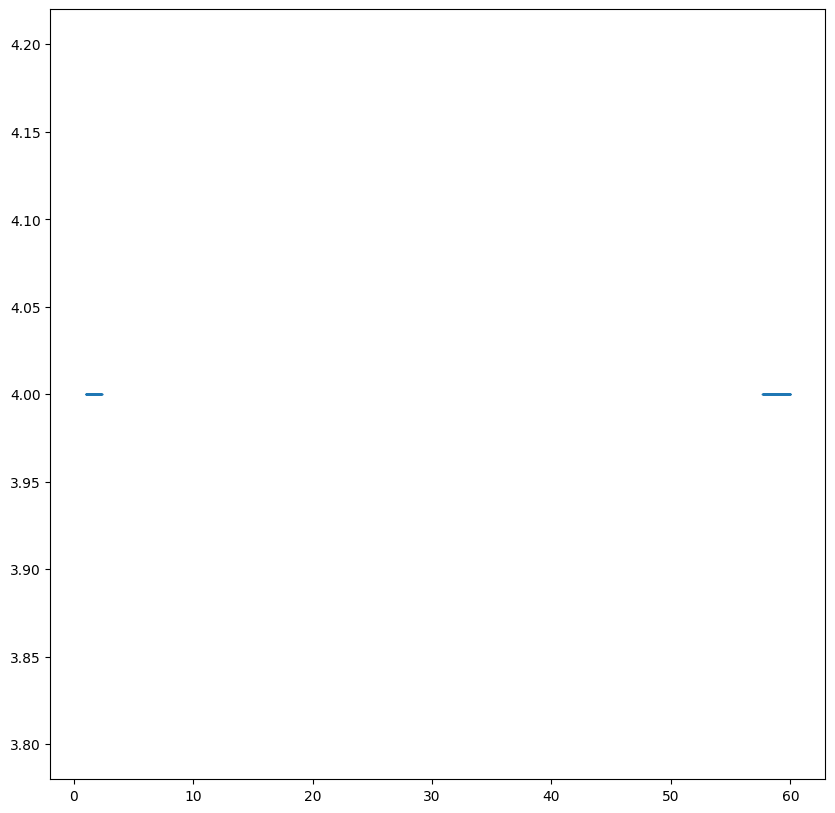

In [37]:
ang_nAt=np.array(ang_nAt)
xs,ys=ang_nAt[:,0],ang_nAt[:,1]
fig, ax = plt.subplots()
ax.scatter(xs,ys,s=0.1)

In [38]:
ang_nAt

array([[ 1.  ,  4.  ,  0.  , -1.  ],
       [ 1.01,  4.  ,  1.  ,  0.  ],
       [ 1.02,  4.  ,  0.  , -1.  ],
       ...,
       [59.97,  4.  ,  1.  ,  0.  ],
       [59.98,  4.  ,  1.  ,  0.  ],
       [59.99,  4.  ,  1.  ,  0.  ]])